<a href="https://colab.research.google.com/github/txrds/twitterSentiment/blob/main/twitterSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import RSLPStemmer
from collections import Counter

In [ ]:
import nltk
nltk.download('rslp')
nltk.download('stopwords')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tw_dados = pd.read_csv('/content/drive/MyDrive/Projetos/Udemy/ChatGPT para Ciências de Dados e ML/twitter.csv', delimiter=';')

In [ ]:
tw_dados.head()

,tweet_text,sentiment
0,pessoa certa vale azevedo,1
1,mim precisamente contrrio vem chuva vem boa di...,1
2,vou fazer video hoje pensando falar pouco sobr...,1
3,aaaaaaaa amei tanto polaroids sei expressar qu...,1
4,valoriza corao menininho vc diferente faa sorr...,1


In [ ]:
print(tw_dados['tweet_text'][4])

valoriza corao menininho vc diferente faa sorrir ter certeza disso valorizo todo mundo vida vai diferente


# Analise

<Axes: title={'center': 'Distribuição de sentimentos'}, xlabel='sentiment'>

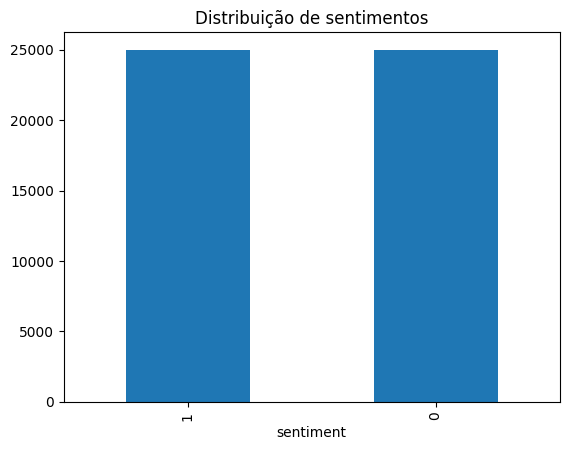

In [ ]:
tw_dados['sentiment'].value_counts().plot(kind='bar', title='Distribuição de sentimentos')


<ipython-input-13-8834b21880a1>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tw_dados['tweet_date'] = pd.to_datetime(tw_dados['tweet_date'])


<Axes: title={'center': 'Tweets ao longo do tempo'}, xlabel='tweet_date'>

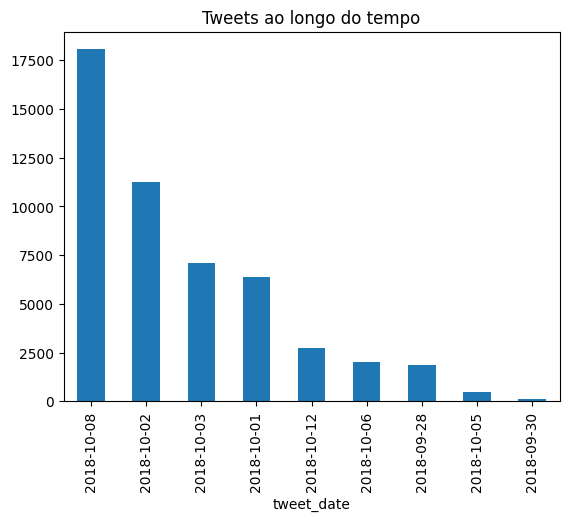

In [ ]:
tw_dados['tweet_date'] = pd.to_datetime(tw_dados['tweet_date'])
tw_dados['tweet_date'].dt.date.value_counts().plot(kind='bar', title='Tweets ao longo do tempo')

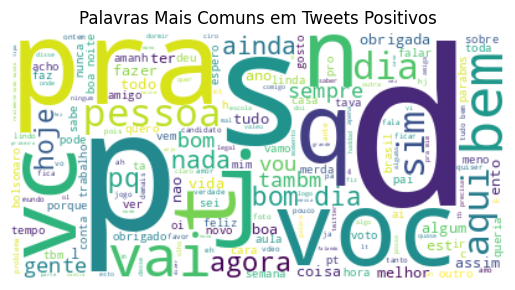

In [ ]:
from wordcloud import WordCloud
positive_tweets = tw_dados[tw_dados['sentiment'] == 1]['tweet_text'].str.cat(sep=' ')
negative_tweets = tw_dados[tw_dados['sentiment'] == 0]['tweet_text'].str.cat(sep=' ')

wordcloud_positive = WordCloud(background_color='white').generate(positive_tweets)
wordcloud_negative = WordCloud(background_color='black').generate(negative_tweets)

plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Palavras Mais Comuns em Tweets Positivos')
plt.axis('off')
plt.show()


# Limpando os Dados

In [ ]:
tw_dados = tw_dados[['tweet_text','sentiment']]

In [ ]:
# Removendo url
def remove_url(text):
  url = re.compile(r'https?://\S+|www\.\S+')
  return url.sub(r'', text)

In [ ]:
# Removendo menções
def remove_mention(text):
  mention = re.compile(r'@\w+')
  return mention.sub(r'', text)

In [ ]:
# removendo pontuações e numeros
def remove_punctuation_and_numbers(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

In [ ]:
# removendo stopwords

stop_words = set(stopwords.words('portuguese'))

def remove_stopwords(text):
    words = text.split()
    return ' '.join([word for word in words if word not in stop_words])


In [ ]:
# Lematização
# stemmer = RSLPStemmer()

# def stem_words(text):
#    words = text.split()
#    return ' '.join([stemmer.stem(word) for word in words])

In [ ]:
# Removendo url
tw_dados['tweet_text'] = tw_dados['tweet_text'].apply(lambda x: remove_url(x))

In [ ]:
# Removendo menções
tw_dados['tweet_text'] = tw_dados['tweet_text'].apply(lambda x: remove_mention(x))

In [ ]:
# removendo pontuações e numeros
tw_dados['tweet_text'] = tw_dados['tweet_text'].apply(lambda x: remove_punctuation_and_numbers(x))

In [ ]:
# Converte em minuscula
tw_dados['tweet_text'] = tw_dados['tweet_text'].apply(lambda x: x.lower())

In [ ]:
# removendo stopwords
tw_dados['tweet_text'] = tw_dados['tweet_text'].apply(lambda x: remove_stopwords(x))

In [ ]:
# Lematização
#tw_dados['tweet_text'] = tw_dados['tweet_text'].apply(lambda x: stem_words(x))

Parece que o modelo treinou bem, mas está com um problema de generalização na predição, pois classificou um tweet claramente negativo como positivo. Aqui estão algumas possíveis causas e sugestões de melhorias:

1. Overfitting
O treinamento mostra que a accuracy no treino aumentou, mas a val_loss aumentou a partir da época 3. Isso pode indicar overfitting: o modelo aprendeu muito bem os dados de treino, mas não generalizou bem nos dados de validação.
Solução:
Regularização: Tente adicionar dropout nas camadas LSTM/GRU.
Reduzir complexidade do modelo: Se a rede for muito profunda ou tiver muitos parâmetros, pode estar memorizando em vez de aprender padrões gerais.
Aumentar os dados: Use mais dados ou técnicas de data augmentation para textos, como sinônimos e parafraseamento.

2. Desequilíbrio nos dados
O modelo pode ter aprendido um viés caso a base tenha mais tweets positivos que negativos.
Solução:
Verifique a distribuição dos dados (df['sentiment'].value_counts()).
Caso haja desequilíbrio, experimente undersampling, oversampling ou pesos nas classes (class_weight no Keras).

3. Representação do Texto
Se os embeddings não estão representando bem o significado dos tweets, o modelo pode ter dificuldades.
Solução:
Teste Word2Vec, GloVe, FastText ou embeddings pré-treinados da BERT ao invés de uma camada Embedding treinada do zero.
Aumente o tamanho da Embedding layer e do vocabulário, se necessário.

4. Erro na Pré-Processamento
A predição errada pode ter ocorrido por causa de limpeza insuficiente dos textos.
Solução:
Remova stopwords, emojis, símbolos, e normalize o texto para reduzir ambiguidades.
Teste a conversão de emojis para palavras (ex: 😍 → "feliz", 😡 → "irritado").

5. Problema na Saída do Modelo
Como o tweet negativo foi classificado como positivo, verifique a função de ativação e como os rótulos são atribuídos.
Solução:
Confirme se o modelo usa sigmoid (para binário) ou softmax (para multiclass) na última camada.
Caso esteja usando sigmoid, aplique um limiar adequado na decisão (ex: y_pred > 0.5 para positivo).
Verifique a correspondência entre y_train e y_test.


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout


# Separar textos e rótulos
texts = tw_dados["tweet_text"].values
labels = tw_dados["sentiment"].values

# 1. Tokenização do texto
vocab_size = 5000  # Tamanho máximo do vocabulário
max_length = 20    # Tamanho máximo das sequências
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index

# Converter textos em sequências de inteiros
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding="post", truncating="post")

# 2. Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# 3. Construir o modelo RNN
embedding_dim = 16
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),  # Camada de Embedding
    SimpleRNN(64, return_sequences=False),  # RNN com 64 unidades
    Dropout(0.5),                           # Regularização para evitar overfitting
    Dense(32, activation="relu"),           # Camada densa intermediária
    Dense(1, activation="sigmoid")          # Camada de saída para classificação binária
])

# 4. Compilar o modelo
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# 5. Treinar o modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,  # Número de épocas
    batch_size=16,  # Tamanho do batch
    verbose=1
)

# 6. Avaliar o modelo
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# 7. Testar em novos tweets
new_tweets = ["Esse produto é ótimo 😍", "Horrível! Nunca mais compro isso 😡"]
new_sequences = tokenizer.texts_to_sequences(new_tweets)
new_padded = pad_sequences(new_sequences, maxlen=max_length, padding="post", truncating="post")
predictions = model.predict(new_padded)

for tweet, pred in zip(new_tweets, predictions):
    sentiment = "Positivo" if pred > 0.5 else "Negativo"
    print(f"Tweet: '{tweet}' => Sentimento: {sentiment}")


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.6483 - loss: 0.6133 - val_accuracy: 0.7614 - val_loss: 0.4930
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7850 - loss: 0.4668 - val_accuracy: 0.7619 - val_loss: 0.4945
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.8197 - loss: 0.4094 - val_accuracy: 0.7468 - val_loss: 0.5163
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8555 - loss: 0.3449 - val_accuracy: 0.7524 - val_loss: 0.5152
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8808 - loss: 0.2875 - val_accuracy: 0.7387 - val_loss: 0.5871
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7390 - loss: 0.5834
Loss: 0.5871, Accuracy: 0.7387
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
Tweet: 'Esse produto é ótimo 😍' => Sentimento: Positivo
Tweet: 'Horrível! Nunca mais compro isso 😡' => Sentimento: Positivo
